# **Build Neural Network Model Using Image Datasets** 

In [23]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from IPython import display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
import warnings
warnings.filterwarnings("ignore")

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
classes = os.listdir(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_09\data\train_data')
classes

['phones', 'sunglasses']

In [4]:
image_generator = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = keras.applications.mobilenet_v2.preprocess_input)

In [5]:
# use a train data generator for the processed images, akes all the pictures from the directory and returns them as an array
train_data_generator = image_generator.flow_from_directory(                                   
    directory = r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_09\data\train_data', 
    class_mode = 'categorical', 
    classes = classes, 
    batch_size = 150, 
    target_size = (224,224)) 

Found 204 images belonging to 2 classes.


In [6]:
x_train, y_train = next(train_data_generator)

In [7]:
base_model = keras.applications.mobilenet_v2.MobileNetV2(
    weights = 'imagenet',
    alpha = 0.5,         # specific parameter of this model,  decreases number of filters & weights
    pooling='avg',       # applies global average pooling to the output of the last conv layer
    include_top = False,
    input_shape= (224,224,3)
)

base_model.trainable = False # It is important to freeze the convolutional base 
                             # before you compile and train the model.

In [8]:
base_model.summary()

Model: "mobilenetv2_0.50_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                                )                                              

In [9]:
# Add oadditional NN layers 
model = keras.Sequential(
    [
        base_model,
        layers.Dense(100, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(len(classes), activation = 'sigmoid')
    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_0.50_224 (Funct  (None, 1280)             706224    
 ional)                                                          
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 834,526
Trainable params: 128,302
Non-trainable params: 706,224
_________________________________________________________________


# **Compile the Neural Network Model and Make Predictions**

In [11]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = keras.losses.categorical_crossentropy, 
              metrics = [keras.metrics.categorical_accuracy])
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [12]:
model.fit(x_train, y_train, 
          epochs=20, 
          verbose=2,
          batch_size=len(x_train),  
          callbacks=[callback], 
          validation_split=0.25)

Epoch 1/20
1/1 - 4s - loss: 1.0268 - categorical_accuracy: 0.3036 - val_loss: 0.5545 - val_categorical_accuracy: 0.7368 - 4s/epoch - 4s/step
Epoch 2/20
1/1 - 1s - loss: 0.4843 - categorical_accuracy: 0.7411 - val_loss: 0.2804 - val_categorical_accuracy: 0.8947 - 956ms/epoch - 956ms/step
Epoch 3/20
1/1 - 1s - loss: 0.2514 - categorical_accuracy: 0.9196 - val_loss: 0.1632 - val_categorical_accuracy: 0.9737 - 1s/epoch - 1s/step
Epoch 4/20
1/1 - 1s - loss: 0.1370 - categorical_accuracy: 0.9821 - val_loss: 0.1184 - val_categorical_accuracy: 0.9474 - 1s/epoch - 1s/step
Epoch 5/20
1/1 - 1s - loss: 0.0955 - categorical_accuracy: 0.9911 - val_loss: 0.0988 - val_categorical_accuracy: 0.9474 - 1s/epoch - 1s/step
Epoch 6/20
1/1 - 1s - loss: 0.0581 - categorical_accuracy: 0.9911 - val_loss: 0.0918 - val_categorical_accuracy: 0.9474 - 1s/epoch - 1s/step
Epoch 7/20
1/1 - 1s - loss: 0.0494 - categorical_accuracy: 0.9911 - val_loss: 0.0939 - val_categorical_accuracy: 0.9474 - 1s/epoch - 1s/step
Epoch 8

In [50]:
model.save(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_09\data\test_data\mobile_glasses_model.h5')

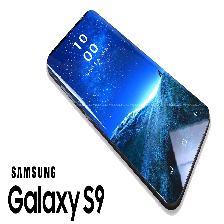

In [55]:
test_pic = keras.preprocessing.image.load_img(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_09\data\test_data\mobile2.png', target_size=(224,224))
test_pic

In [56]:
picture_array = keras.preprocessing.image.img_to_array(test_pic)
image_batch = np.expand_dims(picture_array, axis=0)
processed_image = keras.applications.mobilenet_v2.preprocess_input(image_batch)

In [57]:
# Prediction on test data
model.predict(processed_image)

1/1 [==============================] - 1s 548ms/step


array([[0.9932404 , 0.03507202]], dtype=float32)

In [58]:
train_data_generator.class_indices.keys() 

dict_keys(['phones', 'sunglasses'])

# **Fine Tuning of Neural Network Model**

In [59]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes so that your changes are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.categorical_accuracy])

# Train end-to-end
history = model.fit(x_train, y_train, epochs=20, validation_split = 0.33)

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 0.0180 - categorical_accuracy: 1.0000 - val_loss: 0.0811 - val_categorical_accuracy: 0.9800
Epoch 2/20
4/4 [==============================] - 4s 915ms/step - loss: 0.0169 - categorical_accuracy: 1.0000 - val_loss: 0.0825 - val_categorical_accuracy: 0.9800
Epoch 3/20
4/4 [==============================] - 4s 893ms/step - loss: 0.0095 - categorical_accuracy: 1.0000 - val_loss: 0.0841 - val_categorical_accuracy: 0.9800
Epoch 4/20
4/4 [==============================] - 4s 871ms/step - loss: 0.0084 - categorical_accuracy: 1.0000 - val_loss: 0.0858 - val_categorical_accuracy: 0.9800
Epoch 5/20
4/4 [==============================] - 4s 897ms/step - loss: 0.0475 - categorical_accuracy: 0.9800 - val_loss: 0.0871 - val_categorical_accuracy: 0.9800
Epoch 6/20
4/4 [==============================] - 4s 920ms/step - loss: 0.0386 - categorical_accuracy: 0.9700 - val_loss: 0.0885 - val_categorical_accuracy: 0.9800
Epoch 7/20
4/4 [===

In [60]:
model.save(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_09\data\modelphones_vs_sunglasses.h5')

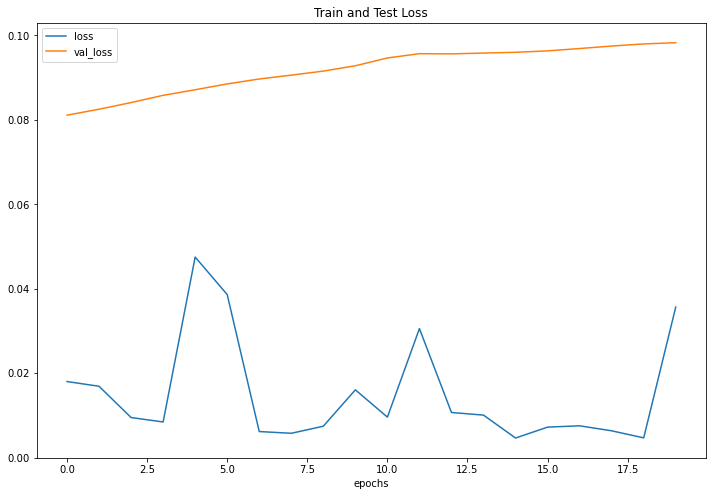

In [62]:
losses = pd.DataFrame(history.history)
losses[['loss', 'val_loss']].plot()
plt.title('Train and Test Loss')
plt.xlabel('epochs')
plt.show()